In [130]:
%matplotlib inline 
import matplotlib.pyplot as plt
from pandas import *
from ggplot import *
import numpy as np
import pandasql

In [61]:
## Import Data
turnstile_weather = pandas.read_csv('3-turnstile_data_master_with_weather.csv')

## Format column names to suit pandasql
turnstile_weather.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace=True)


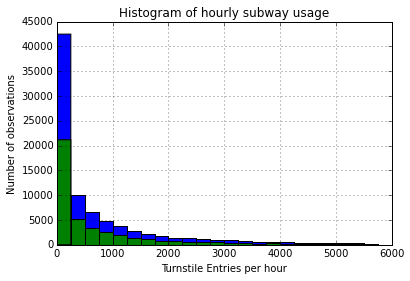

In [134]:
## Plot histogram with matplot
plt.figure()
turnstile_weather['entriesn_hourly'][turnstile_weather['rain'] == 0].hist(bins = range(0, 6000, 250))
turnstile_weather['entriesn_hourly'][turnstile_weather['rain'] == 1].hist(bins = range(0, 6000, 250))
plt.xlim([0,6000])
plt.title("Histogram of hourly subway usage")
plt.xlabel("Turnstile Entries per hour")
plt.ylabel("Number of observations")

In [101]:
## Calculate mean usage by hour
q = """
    SELECT hour, AVG(entriesn_hourly) AS entriesmean_hourly FROM turnstile_weather GROUP BY hour LIMIT 50
    """
entriesmean_hourly = pandasql.sqldf(q.lower(), locals())
entriesmean_hourly


,hour,entriesmean_hourly,strhour
0,0,1167.690147,0 0\n1 1\n2 2\n3 3\n4 ...
1,1,605.048709,0 0\n1 1\n2 2\n3 3\n4 ...
2,2,181.874257,0 0\n1 1\n2 2\n3 3\n4 ...
3,3,38.810592,0 0\n1 1\n2 2\n3 3\n4 ...
4,4,262.313576,0 0\n1 1\n2 2\n3 3\n4 ...
5,5,142.587866,0 0\n1 1\n2 2\n3 3\n4 ...
6,6,77.356750,0 0\n1 1\n2 2\n3 3\n4 ...
7,7,146.389928,0 0\n1 1\n2 2\n3 3\n4 ...
8,8,683.933781,0 0\n1 1\n2 2\n3 3\n4 ...
9,9,1315.495175,0 0\n1 1\n2 2\n3 3\n4 ...


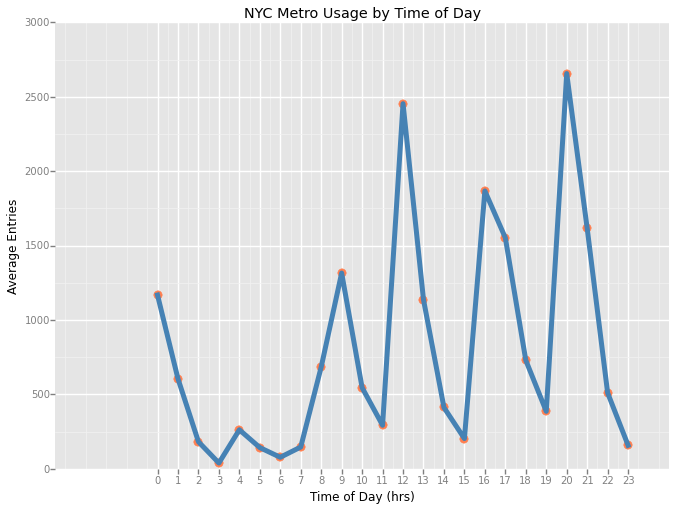

<ggplot: (8785823547081)>

In [122]:
## lines with dots
ggplot(entriesmean_hourly, aes(x = 'hour', y = 'entriesmean_hourly')) + \
        geom_line(x = entriesmean_hourly['hour'], y = entriesmean_hourly['entriesmean_hourly'], color = 'steelblue', size = 5) + \
        geom_point(x = entriesmean_hourly['hour'], y = entriesmean_hourly['entriesmean_hourly'], color = 'coral', size = 70) + \
        labs(title = "NYC Metro Usage by Time of Day", x = "Time of Day (hrs)", y = "Average Entries", ) + \
        ylim(low = 0) + \
        scale_x_discrete(breaks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23),
                  labels=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'))

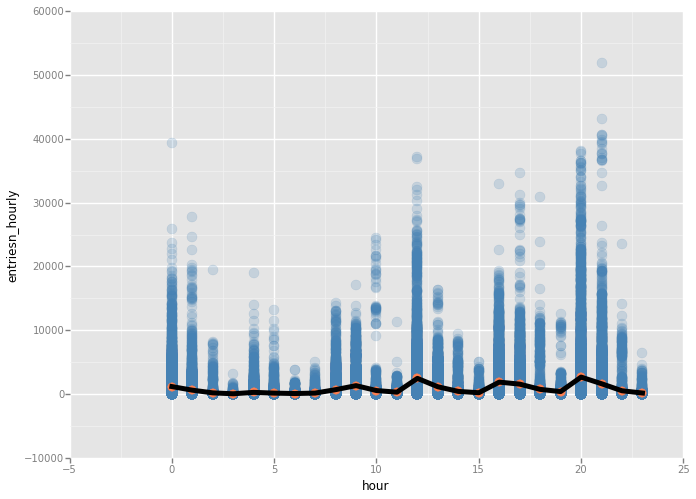

<ggplot: (8785846599541)>

In [94]:
# Plot Scatter plot with means
ggplot(turnstile_weather, aes(x = 'hour', y = 'entriesn_hourly')) + \
        geom_point(color='steelblue', size = 100, alpha = 0.2, stat = 'identity') + \
        geom_line(x = entriesmean_hourly['hour'], y = entriesmean_hourly['entriesmean_hourly'], color = 'black', size = 5) + \
        geom_point(x = entriesmean_hourly['hour'], y = entriesmean_hourly['entriesmean_hourly'], color = 'coral', size = 70)

#        geom_point(color='steelblue', size=100, alpha = 0.2, stat = 'identity') + \
#        geom_histogram(color='steelblue', size=100, alpha = 0.2, stat = 'bar')
#        geom_bar(stat = 'identity')

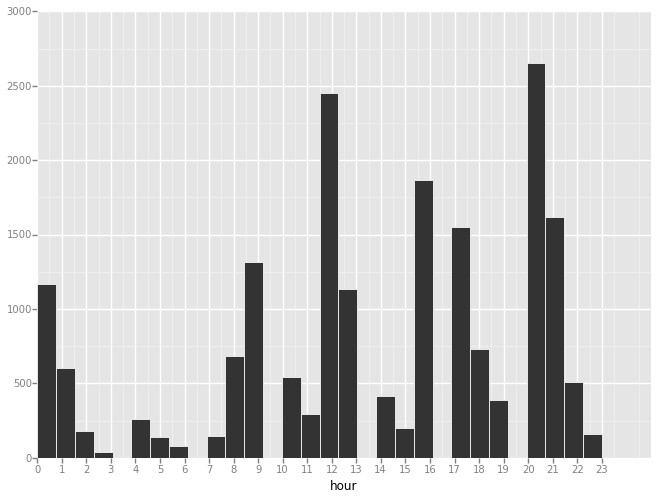

<ggplot: (8785834829089)>

In [113]:
## bar graphs - fucked on the x-axis, not sure why...
ggplot(entriesmean_hourly, aes(x = 'hour', weight = 'entriesmean_hourly')) + \
        geom_bar(size = 1) + \
        scale_x_discrete(breaks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23),
                  labels=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'))
#        geom_line(x = entriesmean_hourly['hour'], y = entriesmean_hourly['entriesmean_hourly'], color = 'black', size = 5) + \
#        geom_point(x = entriesmean_hourly['hour'], y = entriesmean_hourly['entriesmean_hourly'], color = 'coral', size = 70)


In [88]:
np.max(turnstile_weather['entriesn_hourly'])

51839.0

In [123]:
## SQL
q = """
    SELECT * FROM turnstile_weather LIMIT 10
    """
play = pandasql.sqldf(q.lower(), locals())
play

,unnamed:_0,unit,daten,timen,hour,descn,entriesn_hourly,exitsn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0,0,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217,553,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890,1262,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451,3708,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400,2501,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
5,5,R001,2011-05-01,21:00:00,21,REGULAR,3372,2122,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
6,6,R002,2011-05-01,01:00:00,1,REGULAR,0,0,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
7,7,R002,2011-05-01,05:00:00,5,REGULAR,42,66,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
8,8,R002,2011-05-01,09:00:00,9,REGULAR,50,125,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
9,9,R002,2011-05-01,13:00:00,13,REGULAR,316,716,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0


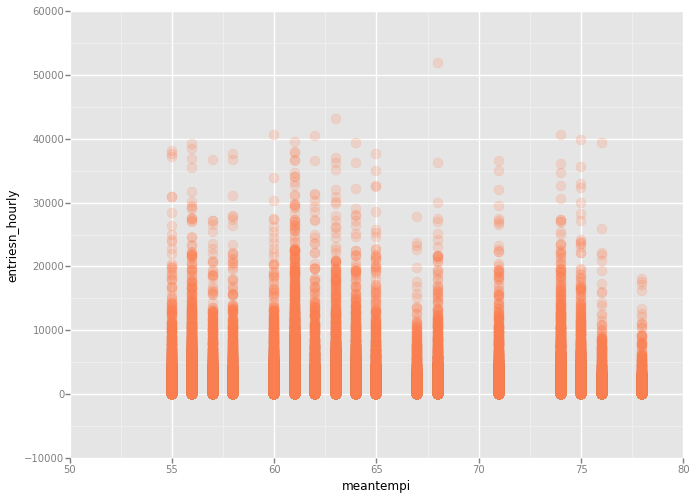

<ggplot: (8785823541889)>

In [127]:
# Plot Scatter plot with means
ggplot(turnstile_weather, aes(x = 'meantempi', y = 'entriesn_hourly')) + \
        geom_point(color='coral', size = 100, alpha = 0.2, stat = 'identity')